# Fraud Detection 
## Binary Imbalanced Classification Problem

#### Agorithms to be used
- Logistic Regression
- Decision Tree
- Random Forest
- SVM
- KNN



#### Metrics used to validate Performance of the model
- Confusion Matrix
- Precision
- Recall
- F1 Score
- Area Under ROC Curve (AUROC) 

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('creditcard.csv')

In [36]:
df = data.copy(deep=True)

In [37]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [38]:
df.Class.unique()

array([0, 1])

In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: ylabel='Amount'>

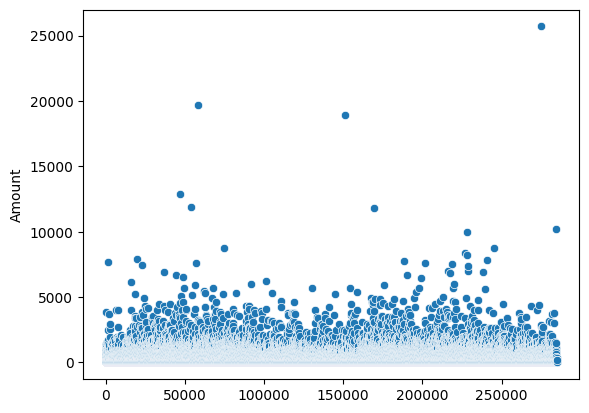

In [41]:
sns.scatterplot(df['Amount'])

<Axes: ylabel='Time'>

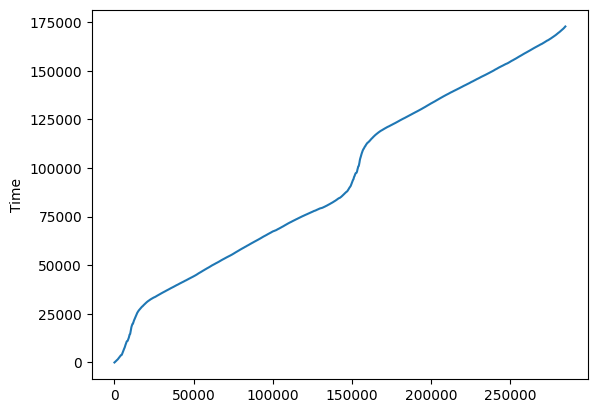

In [42]:
sns.lineplot(df['Time'])

In [43]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [44]:
total_data = df.Class.value_counts()[0] + df.Class.value_counts()[1]
NFT = (df.Class.value_counts()[0]/total_data) * 100
FT = (df.Class.value_counts()[1]/total_data) * 100
print("Percentage of Fraudlent transfer = {} & Perdentage of Non-Fraudlent transfer = {}".format(FT,NFT))

Percentage of Fraudlent transfer = 0.1727485630620034 & Perdentage of Non-Fraudlent transfer = 99.82725143693798


<Axes: xlabel='Class', ylabel='count'>

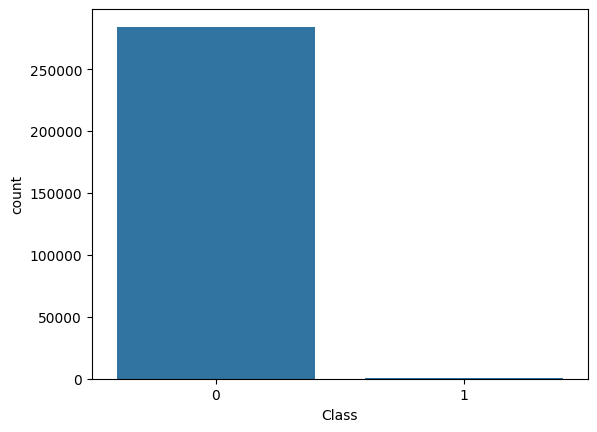

In [45]:
sns.barplot(data=df.Class.value_counts())

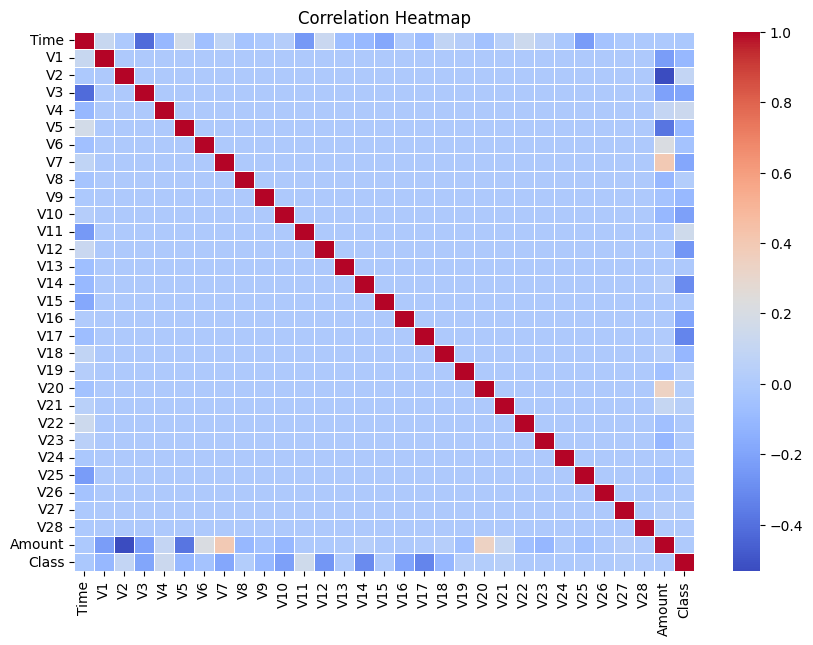

In [46]:

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [69]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [68]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [79]:
legit = legit.sample(492)
print('shape of fraud = {} & legit = {}'.format(fraud.shape,legit.shape))

shape of fraud = (492, 31) & legit = (492, 31)


In [80]:
df2 = pd.concat([legit, fraud], axis=0, ignore_index=True)

In [83]:
df2['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

#### Data Split to Features & Predict 

In [84]:

x = df2.drop(columns=['Class'])
y = df2['Class']

#### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.8)

In [90]:
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (787, 30)
train size y :  (787,)
test size X :  (197, 30)
test size y :  (197,)


from imblearn.over_sampling import RandomOverSampler

# Example of random oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversampler.fit_resample(X_trains, y_trains)


#### Features Scaling

In [91]:

from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

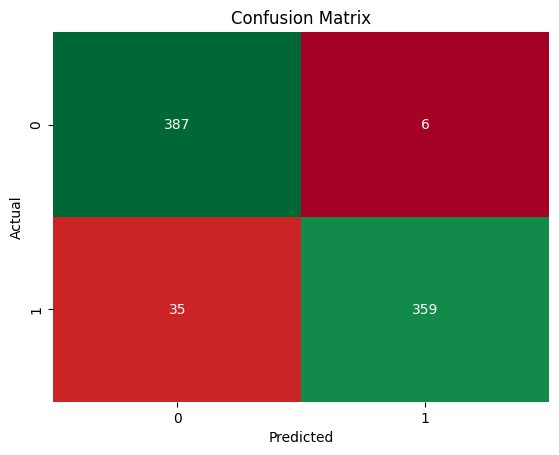

In [106]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [107]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = lr.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  0.9835616438356164
Recall =  0.9111675126903553
F-1 Score =  0.9459815546772069


In [108]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 93.90%


In [ ]:
dsfasdf

# Focusing ON logistic Regression for now

#### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

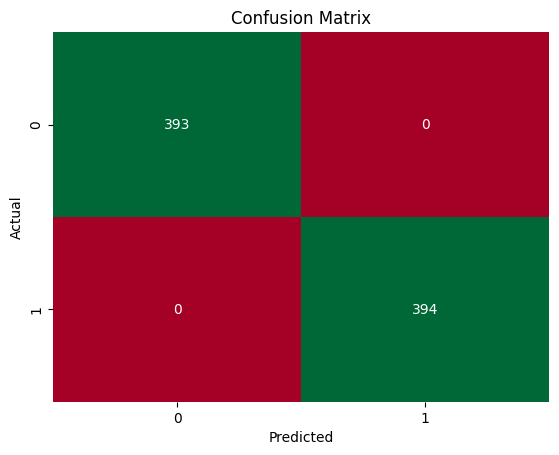

In [93]:
from sklearn.metrics import confusion_matrix

y_pred = dtree.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [94]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = dtree.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


#### Cross-Validation Score

In [95]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(dtree, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 91.87%


#### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

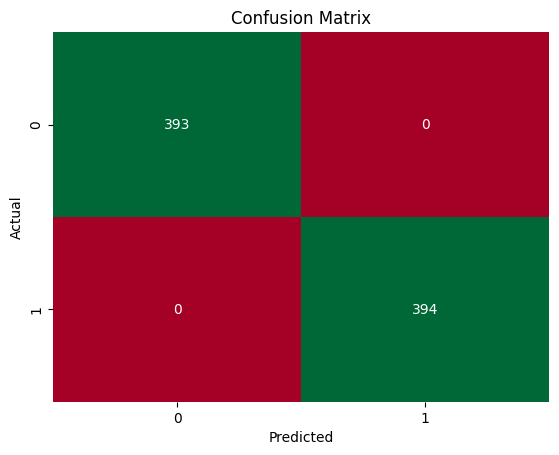

In [97]:
from sklearn.metrics import confusion_matrix

y_pred = rfc.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [98]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = rfc.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


#### Cross-Validation Score

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 94.79%


#### XGBoost Classifier

In [100]:
from xgboost import XGBClassifier

xgb = XGBClassifier(gamma=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

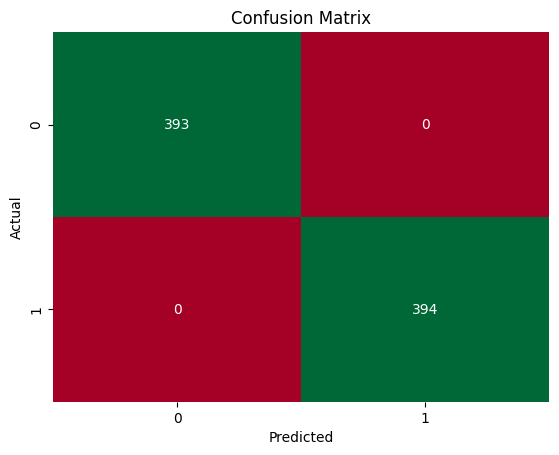

In [101]:
from sklearn.metrics import confusion_matrix

y_pred = xgb.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = xgb.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


#### Cross-Validation Score

In [103]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring='accuracy')
print("Cross-validated Accuracy: %.2f%%" % (np.mean(cv_results) * 100))

Cross-validated Accuracy: 94.02%


In [104]:
MP_Metrics = pd.DataFrame({'Models':['Decision Tree','Random Forest Classifier','Xgboost'],
                                   'Precision':[1,1,1],
                                   'Recall':[1,1,1],
                                   'F1-Score':[1,1,1],
                                   'Cross-Validation':[99.97,100,99.99]})
MP_Metrics

,Models,Precision,Recall,F1-Score,Cross-Validation
0,Decision Tree,1,1,1,99.97
1,Random Forest Classifier,1,1,1,100.00
2,Xgboost,1,1,1,99.99
